In [1]:
!pip install torch torchvision torchaudio
!pip install matplotlib
!pip install numpy
!pip install pillow
!pip install opencv-python
!pip install scipy
!pip install imageio
!pip install tqdm


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.8/315.8 kB 8.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/315.8 kB ? eta -:--:--

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.8/315.8 kB 6.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from torchvision.datasets import CelebA
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
import torchvision.utils as vutils
import cv2
import imageio
from tqdm import tqdm
import scipy
import hashlib


In [3]:
from __future__ import print_function

import argparse
import os
import random
import torch
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML


manualSeed = 999

print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

Random Seed:  999


In [4]:
# class ImageDataset(Dataset):
#     def __init__(self, root, transform=None):
#         self.root = root
#         self.transform = transform
#         self.image_paths = sorted([f for f in os.listdir(root) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))])

#     def __len__(self):
#         return len(self.image_paths)

#     def __getitem__(self, idx):
#         img_path = os.path.join(self.root, self.image_paths[idx])
#         image = Image.open(img_path).convert("RGB")
#         if self.transform:
#             image = self.transform(image)
#         return image


In [5]:
# # Transformation pipeline for high-quality images
# transform = transforms.Compose([
#     transforms.Resize(512),
#     transforms.CenterCrop(512),
#     transforms.ToTensor(),
#     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
# ])

In [6]:
#!unzip flickrfaceshq-dataset-ffhq.zip -d images

In [7]:
# dataroot = "/content/images"

In [8]:
# dataset = ImageDataset(root=dataroot, transform=transform)

In [9]:
# dataloader = DataLoader(dataset, batch_size=512, shuffle=True, num_workers=4)

In [10]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [13]:
# real_batch = next(iter(dataloader))
# plt.figure(figsize=(8,8))
# plt.axis("off")
# plt.title("Training Images")
# plt.imshow(np.transpose(vutils.make_grid(real_batch.to(device)[:8], padding=2, normalize=True).cpu(), (1,2,0)))
# plt.show()

In [14]:
# Hyperparameters
workers = 4
batch_size = 512
nc = 3  # Number of channels (RGB)
nz = 100  # Size of latent vector
ngf = 64  # Size of feature maps in generator
ndf = 64  # Size of feature maps in discriminator
num_epochs = 5
lr = 0.0002
beta1 = 0.5
ngpu = 1  # Number of GPUs
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

In [15]:
device

device(type='cpu')

In [16]:
import hashlib
import string
import hmac
import random

# Define the custom character set (0-9, a-z, and special characters)
CUSTOM_CHARSET = string.digits + string.ascii_lowercase + "!@#$%^&*()-_=+<>?/"

def generate_video_key(input_string: str, salt: bytes = None, length: int = 64) -> str:
    """
    Generates a 64-character hash using SHA3-512 and maps it to a custom character set.

    - Input: Any string (e.g., user secret, video metadata)
    - Output: A unique, reproducible 64-character hash using digits, a-z, and special characters.
    """
    if salt is None:
        salt = user_secret.encode()[:8] + b'pranay_pro'  # Use a fixed salt for reproducibility

    # Step 1: Generate SHA3-512 hash
    raw_hash = hmac.new(salt, input_string.encode(), hashlib.sha3_512).hexdigest()  # 128 hex chars

    # Step 2: Convert hex to integer
    hash_int = int(raw_hash, 16)
    hash_int = ((hash_int >> 3) | (hash_int << 5)) % (2**512)  # Bitwise shuffle

    # Step 3: Map hash to the custom character set
    custom_hash = []
    char_count = len(CUSTOM_CHARSET)

    for _ in range(length):  # Ensure exactly `length` characters
        custom_hash.append(CUSTOM_CHARSET[hash_int % char_count])
        hash_int //= char_count  # Reduce hash_int to get new index

    return "".join(custom_hash)



# ------------------------------
# 🔹 Example Usage
# ------------------------------
user_secret = "my_secret_key"
video_metadata = "fps:30-resolution:1920x1080-duration:120"

custom_hash = generate_video_key(user_secret + video_metadata)
print("Custom Hash:", custom_hash)


Custom Hash: hr*_uzy-nje(d=_ph(nd/4l6/t>)#8u=6k(o#689#)b7_ej_(zwox(#c1lmx95$/


In [17]:
# # for chatgpt crazy logic prime ka
# import hashlib
# import hmac

# # Large prime numbers for obfuscation
# PRIME_1 = 15485863  # Large prime
# PRIME_2 = 32452843  # Another large prime

# def generate_frame_key(global_video_key: str, frame_index: int) -> str:
#     """
#     Derives a unique Frame-Specific Key (FSK) using:
#       - HMAC-SHA3-512 for cryptographic security
#       - Bitwise XOR, Modulo, and Shift operations for additional obfuscation
#     """
#     salt = b'strong_frame_salt'  # Secure salt

#     # Mathematical transformation for additional security
#     transformed_index = ((frame_index ^ PRIME_1) * PRIME_2) % (2**32)
#     shifted_index = (transformed_index << 3) | (transformed_index >> 5)  # Left and right shift

#     # Combine with global_video_key in a non-linear way
#     message = f"{global_video_key[::-1]}|{shifted_index}".encode('utf-8')  # Reverse global_video_key

#     # Generate HMAC-based hash
#     frame_key = hmac.new(salt, message, hashlib.sha3_512).hexdigest()

#     return frame_key

# # ------------------------------
# # 🔹 Example Usage
# # ------------------------------
# global_video_key = "abc12345def"  # Example key
# frame_index = 10

# strong_frame_key = generate_frame_key(global_video_key, frame_index)
# print("Stronger Frame Key:", strong_frame_key)


In [18]:
# XOR ka logic jho mujhe samjha and sahi laga thoda
import hashlib
import hmac



def generate_frame_key(global_video_key: str, frame_index: int) -> str:
    """
    Derives a unique Frame-Specific Key (FSK) using:
      - HMAC-SHA3-512 for cryptographic security
      - Bitwise XOR, Modulo, and Shift operations for additional obfuscation
    """
    salt = b'Pranay_pro'  # Secure salt

    # Mathematical transformation for additional security
    transformed_index = frame_index ^ 0xA5A5A5A5  # Bitwise XOR with fixed mask


    shifted_index = (transformed_index << 3) | (transformed_index >> 5)  # Left and right shift

    # Combine with global_video_key in a non-linear way
    message = f"{global_video_key}^{shifted_index}".encode('utf-8')  # Reverse global_video_key

    # Generate HMAC-based hash
    frame_key = hmac.new(salt, message, hashlib.sha3_512).hexdigest()

    return frame_key



# ------------------------------
# 🔹 Example Usage
# ------------------------------
global_video_key = "abc12345def"  # Example key
frame_index = 10

strong_frame_key = generate_frame_key(global_video_key, frame_index)
print("Stronger Frame Key:", strong_frame_key)


Stronger Frame Key: 7ea42ccafc77578e8b7c8123d73f8c0c9278a3172ba6e728b4b1bd8d607d5911eeb46e700d393017ea444ef099e20dd63593d1d8753d6e5fc53d36c6bf5a5285


In [19]:
# def generate_video_key(user_secret: str, video_metadata: dict) -> str:
#     """
#     Generates a Global Video Key (GVK) based on user secret and video metadata.
#     """
#     meta_string = f"{video_metadata['fps']}-{video_metadata['resolution']}-{video_metadata['duration']}"
#     combined = f"{user_secret}+{meta_string}"
#     video_key = hashlib.sha3_256(combined.encode()).hexdigest()
#     return video_key


In [20]:
# def generate_frame_key(global_video_key: str, frame_index: int) -> str:
#     """
#     Derives a unique Frame-Specific Key (FSK) using the GVK and frame index.
#     """
#     combined = f"{global_video_key}-{frame_index}"
#     frame_key = hashlib.sha3_256(combined.encode()).hexdigest()
#     return frame_key

In [21]:
import random
import string

def generate_random_strings(num_strings=50, length=12):
    """
    Generates a list of `num_strings` random English-like words.
    Each word is `length` characters long and made of random English letters.
    """
    words = []
    for _ in range(num_strings):
        word = "".join(random.choices(string.ascii_lowercase, k=length))  # Random English-like word
        words.append(word)
    return words

# Generate 50 random user secrets
user_secrets = generate_random_strings(num_strings=50, length=12)

# Print example user secrets
print("User Secrets:", user_secrets[:5])  # Print first 5 for preview


User Secrets: ['ucwomduiuvcz', 'egosgwzfqbaf', 'znerexoymstd', 'qmtgcvguhnbu', 'lcxoefufnhgp']


In [22]:
import torch
import os
import random
import string
import hmac
import hashlib
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image


class WatermarkedImageDataset(Dataset):
    def __init__(self, root, transform=None):
        self.root = root
        self.transform = transform
        self.image_paths = sorted([os.path.join(root, f) for f in os.listdir(root) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))])

        # Generate 50 random user secrets for videos
        self.user_secrets = generate_random_strings(num_strings=50, length=12)

        # Randomly assign each image to a user secret and frame index
        self.image_metadata = []
        for img_path in self.image_paths:
            user_secret = random.choice(self.user_secrets)  # Random user secret
            frame_index = random.randint(1, 100)  # Random frame index
            video_metadata = "fps:30-resolution:1920x1080-duration:120"
            global_video_key = generate_video_key(user_secret+video_metadata)
            frame_key = generate_frame_key(global_video_key, frame_index)
            self.image_metadata.append((user_secret, frame_index, global_video_key, frame_key))

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        user_secret, frame_index, global_video_key, frame_key = self.image_metadata[idx]

        return image, user_secret, frame_index, global_video_key, frame_key

# 🔹 Step 5: Define Transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# 🔹 Step 6: Create DataLoader for Training GAN
dataroot = "/kaggle/input/flickrfaceshq-dataset-ffhq"  # Update this with your dataset path
dataset = WatermarkedImageDataset(root=dataroot, transform=transform)
dataloader = DataLoader(dataset, batch_size=512, shuffle=True, num_workers=4)

# 🔹 Test DataLoader
for batch in dataloader:
    images, user_secrets, frame_indices, global_video_keys, frame_keys = batch
    print("Batch Loaded!")
    print("Images Shape:", images.shape)
    print("First User Secret:", user_secrets[0])
    print("First Frame Index:", frame_indices[0])
    print("First GVK:", global_video_keys[0][:10], "...")  # Print first 10 characters
    print("First FSK:", frame_keys[0][:10], "...")
    break  # Exit after first batch test


Batch Loaded!
Images Shape: torch.Size([512, 3, 128, 128])
First User Secret: ntevlhokudik
First Frame Index: tensor(97)
First GVK: _@?y^o3l@* ...
First FSK: 6cab59776d ...


In [23]:
# def hash_to_noise_vector(frame_key: str, latent_dim: int = 10) -> torch.Tensor:
#     """
#     Converts a frame-specific hash into a noise vector.
#     The latent_dim here corresponds to the watermark dimension.
#     """
#     hash_bytes = bytes.fromhex(frame_key)
#     hash_ints = list(hash_bytes)
#     # Ensure we have enough integers; repeat if needed
#     if len(hash_ints) < latent_dim:
#         hash_ints = (hash_ints * (latent_dim // len(hash_ints) + 1))[:latent_dim]
#     else:
#         hash_ints = hash_ints[:latent_dim]
#     # Normalize values to [-1, 1]
#     noise_array = np.array(hash_ints) / 128.0 - 1.0
#     return torch.tensor(noise_array, dtype=torch.float32)



In [24]:
import torch
import numpy as np

def hash_to_noise_vector(frame_key: str, latent_dim: int = 10) -> torch.Tensor:
    """
    Converts a frame-specific hash into a noise vector.
    - Uses dataset hash keys in training & testing (no randomness).
    - Latent_dim corresponds to the watermark dimension.
    """
    hash_bytes = bytes.fromhex(frame_key)
    hash_ints = list(hash_bytes)

    # Ensure we have enough integers; repeat if needed
    if len(hash_ints) < latent_dim:
        hash_ints = (hash_ints * (latent_dim // len(hash_ints) + 1))[:latent_dim]
    else:
        hash_ints = hash_ints[:latent_dim]

    # Normalize values to [-1, 1]
    noise_array = np.array(hash_ints) / 128.0 - 1.0
    return torch.tensor(noise_array, dtype=torch.float32)

# def get_watermark_tensor(batch_size, watermark_dim, global_video_keys, frame_indices):
#     """
#     Returns a watermark tensor:
#       ✅ Uses dataset hash-based noise for both training & testing.
#       ✅ No random noise.
#       ✅ Fetches noise from dataset-provided keys.

#     global_video_keys: List of video keys (batch size length).
#     frame_indices: List of frame indices (batch size length).
#     """
#     watermarks = []
#     for gvk, idx in zip(global_video_keys, frame_indices):
#         frame_key = generate_frame_key(gvk, idx.item())  # Ensure idx is int
#         watermark = hash_to_noise_vector(frame_key, latent_dim=watermark_dim)
#         watermarks.append(watermark)

#     watermarks = torch.stack(watermarks).unsqueeze(-1).unsqueeze(-1)  # Shape: [B, watermark_dim, 1, 1]
#     return watermarks


In [25]:
# def get_watermark_tensor(batch_size, watermark_dim, training=True, global_video_key=None, frame_indices=None):
#     """
#     Returns a watermark tensor:
#       - In training mode, returns random noise.
#       - In testing mode, uses hash functions to generate a unique noise vector for each frame.
#     """
#     if training:
#         return torch.randn(batch_size, watermark_dim, 1, 1)
#     else:
#         watermarks = []
#         for idx in frame_indices:
#             frame_key = generate_frame_key(global_video_key, idx)
#             watermark = hash_to_noise_vector(frame_key, latent_dim=watermark_dim)
#             watermarks.append(watermark)
#         watermarks = torch.stack(watermarks).unsqueeze(-1).unsqueeze(-1)  # Shape: [B, watermark_dim, 1, 1]
#         return watermarks

In [26]:
# class PixelNoise(nn.Module):
#     """
#     Injects pixel-level noise into feature maps.
#     - In training mode, uses random noise.
#     - In testing mode (when use_hash_noise is True and hash parameters are provided),
#       it uses deterministic hash-based noise.

#     Note: The original "num_pixels" parameter is kept for compatibility, but here we override
#     it by using the input's channel dimension.
#     """
#     def __init__(self, num_pixels, noise_intensity):
#         super(PixelNoise, self).__init__()
#         self.num_pixels = num_pixels           # Original intended dimension (ignored in forward)
#         self.noise_intensity = noise_intensity
#         # Flags/attributes to control hash-based noise:
#         self.use_hash_noise = False            # Default: random noise for training
#         self.global_video_key = None
#         self.frame_indices = None

#     def forward(self, x):
#         batch_size, channels, H, W = x.shape
#         # Use the input's channel dimension as the noise dimension
#         noise_dim = channels

#         if self.use_hash_noise and self.global_video_key is not None and self.frame_indices is not None:
#             # Generate deterministic noise using the hash-based functions
#             noise = get_watermark_tensor(batch_size, noise_dim, training=False,
#                                          global_video_key=self.global_video_key, frame_indices=self.frame_indices)
#             # Expand to match the spatial dimensions of x
#             noise = noise.expand(batch_size, noise_dim, H, W)
#         else:
#             # Generate random noise (for training)
#             noise = torch.randn(batch_size, noise_dim, H, W, device=x.device)
#         return x + noise * self.noise_intensity


In [27]:
# import torch
# import torch.nn as nn
# import numpy as np

# class PixelNoise(nn.Module):
#     """
#     Injects pixel-level noise into feature maps.
#     - Uses `frame_keys` from DataLoader (NO recomputation).
#     - Learns optimal:
#         ✅ Watermark intensity (invisibility factor).
#         ✅ X, Y coordinates for embedding the watermark.
#         ✅ Patch size (relative to image size).
#     """
#     def __init__(self, init_intensity=0.05, init_patch_ratio=1/3):
#         super(PixelNoise, self).__init__()

#         # Learnable parameters (optimized during training)
#         self.noise_intensity = nn.Parameter(torch.tensor(init_intensity, dtype=torch.float32))  # Intensity
#         self.patch_x = nn.Parameter(torch.tensor(0.5, dtype=torch.float32))  # X coordinate (normalized 0-1)
#         self.patch_y = nn.Parameter(torch.tensor(0.5, dtype=torch.float32))  # Y coordinate (normalized 0-1)
#         self.patch_size_ratio = nn.Parameter(torch.tensor(init_patch_ratio, dtype=torch.float32))  # Patch size ratio

#     def forward(self, x, frame_keys):
#         """
#         x: Batch of images (B, C, H, W)
#         frame_keys: Batch of frame-specific keys from DataLoader
#         """
#         batch_size, channels, H, W = x.shape
#         noise_dim = channels  # Noise dimension matches input channels

#         # Convert frame keys into noise vectors
#         noise_list = [hash_to_noise_vector(frame_keys[i % batch_size], latent_dim=noise_dim) for i in range(batch_size)]
#         noise = torch.stack(noise_list).unsqueeze(-1).unsqueeze(-1).to(x.device)  # Shape: [B, noise_dim, 1, 1]
#         noise = noise.expand(batch_size, noise_dim, H, W)  # Match spatial dimensions

#         # Convert learnable X, Y positions into actual pixel locations
#         patch_H = int(H * self.patch_size_ratio.item())
#         patch_W = int(W * self.patch_size_ratio.item())
#         x_offset = int(self.patch_x.item() * (H - patch_H))
#         y_offset = int(self.patch_y.item() * (W - patch_W))

#         # Embed noise ONLY in the learned patch region
#         # ✅ Create a copy of x to avoid inplace operation:
#         x_noisy = x.clone()

#         # Embed noise ONLY in the learned patch region
#         x_noisy[:, :, x_offset:x_offset + patch_H, y_offset:y_offset + patch_W] += (
#             noise[:, :, x_offset:x_offset + patch_H, y_offset:y_offset + patch_W] * self.noise_intensity
#         )

#         return x_noisy # ✅ Return the copy



In [28]:
import torch
import torch.nn as nn
import numpy as np

class PixelNoise(nn.Module):
    """
    Injects pixel-level noise into feature maps.
    - Uses `frame_keys` from DataLoader (NO recomputation).
    - Learns optimal:
        ✅ Watermark intensity (invisibility factor).
        ✅ X, Y coordinates for embedding the watermark.
        ✅ Patch size (relative to image size).
    """
    def __init__(self, init_intensity=0.3, init_patch_ratio=1/3):
        super(PixelNoise, self).__init__()

        # Learnable parameters (optimized during training)
        self.noise_intensity = nn.Parameter(torch.tensor(init_intensity, dtype=torch.float32))  # Intensity
        self.patch_x = nn.Parameter(torch.tensor(0.5, dtype=torch.float32))  # X coordinate (normalized 0-1)
        self.patch_y = nn.Parameter(torch.tensor(0.5, dtype=torch.float32))  # Y coordinate (normalized 0-1)
        self.patch_size_ratio = nn.Parameter(torch.tensor(init_patch_ratio, dtype=torch.float32))  # Patch size ratio

    def forward(self, x, frame_keys):
        """
        x: Batch of images (B, C, H, W)
        frame_keys: Batch of frame-specific keys from DataLoader
        """
        batch_size, channels, H, W = x.shape
        noise_dim = channels  # Noise dimension matches input channels

        # Convert frame keys into noise vectors
        noise_list = [hash_to_noise_vector(frame_keys[i % batch_size], latent_dim=noise_dim) for i in range(batch_size)]
        noise = torch.stack(noise_list).unsqueeze(-1).unsqueeze(-1).to(x.device)  # Shape: [B, noise_dim, 1, 1]
        noise = noise.expand(batch_size, noise_dim, H, W)  # Match spatial dimensions

        # Convert learnable X, Y positions into actual pixel locations
        patch_H = int(H * self.patch_size_ratio.item())
        patch_W = int(W * self.patch_size_ratio.item())
        x_offset = int(self.patch_x.item() * (H - patch_H))
        y_offset = int(self.patch_y.item() * (W - patch_W))

        # ✅ Fix: Ensure watermark intensity is always between 0.2 and 0.5
        noise_intensity = torch.clamp(self.noise_intensity, 0.2, 0.5)

        # ✅ Create a copy of x to avoid inplace operation
        x_noisy = x.clone()

        # Embed noise ONLY in the learned patch region
        x_noisy[:, :, x_offset:x_offset + patch_H, y_offset:y_offset + patch_W] += (
            noise[:, :, x_offset:x_offset + patch_H, y_offset:y_offset + patch_W] * noise_intensity
        )

        return x_noisy  # ✅ Return the modified image


In [29]:
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.2)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.2)
        nn.init.constant_(m.bias.data, 0)

In [30]:
# class Generator(nn.Module):
#     def __init__(self, ngpu, nz, ngf, nc):
#         super(Generator, self).__init__()
#         self.ngpu = ngpu
#         # The generator structure is left untouched.
#         self.main = nn.Sequential(
#             nn.ConvTranspose2d(nz, ngf * 16, 4, 1, 0, bias=False),
#             nn.BatchNorm2d(ngf * 16),
#             nn.LeakyReLU(0.2, inplace=True),
#             PixelNoise(num_pixels=50, noise_intensity=0.05),

#             nn.ConvTranspose2d(ngf * 16, ngf * 8, 4, 2, 1, bias=False),
#             nn.BatchNorm2d(ngf * 8),
#             nn.LeakyReLU(0.2, inplace=True),
#             PixelNoise(num_pixels=40, noise_intensity=0.04),

#             nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
#             nn.BatchNorm2d(ngf * 4),
#             nn.LeakyReLU(0.2, inplace=True),
#             PixelNoise(num_pixels=30, noise_intensity=0.03),

#             nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 2, 1, bias=False),
#             nn.BatchNorm2d(ngf * 2),
#             nn.LeakyReLU(0.2, inplace=True),

#             nn.ConvTranspose2d(ngf * 2, ngf, 4, 2, 1, bias=False),
#             nn.BatchNorm2d(ngf),
#             nn.LeakyReLU(0.2, inplace=True),
#             PixelNoise(num_pixels=20, noise_intensity=0.02),

#             nn.ConvTranspose2d(ngf, ngf, 3, 1, 1, bias=False),
#             nn.BatchNorm2d(ngf),
#             nn.LeakyReLU(0.2, inplace=True),

#             nn.ConvTranspose2d(ngf, nc, 4, 2, 1, bias=False),
#             nn.Tanh()
#         )

#     def forward(self, input):
#         return self.main(input)

In [31]:
import torch
import torch.nn as nn

class Generator(nn.Module):
    def __init__(self, ngpu, nz, ngf, nc):
        super(Generator, self).__init__()
        self.ngpu = ngpu

        # Define PixelNoise layers separately so they can receive frame_keys
        self.pixel_noise_1 = PixelNoise(init_intensity=0.05, init_patch_ratio=1/3)


        # Define main generator architecture
        self.main = nn.Sequential(
            nn.ConvTranspose2d(nz, ngf * 16, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 16),
            nn.LeakyReLU(0.2, inplace=True),

            nn.ConvTranspose2d(ngf * 16, ngf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.LeakyReLU(0.2, inplace=True),

            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.LeakyReLU(0.2, inplace=True),

            nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.LeakyReLU(0.2, inplace=True),

            nn.ConvTranspose2d(ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.LeakyReLU(0.2, inplace=True),

            nn.ConvTranspose2d(ngf, ngf, 3, 1, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.LeakyReLU(0.2, inplace=True),

            nn.ConvTranspose2d(ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, input, frame_keys):
        """
        input: Random noise vector (B, nz, 1, 1)
        frame_keys: List of frame-specific hash keys from DataLoader
        """
        x = self.main(input)

        # Apply PixelNoise layers (Pass frame_keys correctly)
        x = self.pixel_noise_1(x, frame_keys)

        return x


In [32]:
import torch
import torch.nn as nn

class Discriminator(nn.Module):
    def __init__(self, ngpu, nc=3, ndf=64):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu

        self.main = nn.Sequential(
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        """
        input: Real or Fake images (Batch, Channels, H, W)
        """
        return self.main(input)  # ✅ Processes batch images properly


In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.utils as vutils

# ✅ Create the generator
netG = Generator(ngpu, nz, ngf, nc).to(device)

# ✅ Handle multi-gpu if desired
if (device.type == 'cuda') and (ngpu > 1):
    netG = nn.DataParallel(netG, list(range(ngpu)))

# ✅ Apply the weights_init function to randomly initialize all weights
netG.apply(weights_init)

# ✅ Print the model
print(netG)


# ✅ Create the Discriminator
netD = Discriminator(ngpu).to(device)

# ✅ Handle multi-gpu if desired
if (device.type == 'cuda') and (ngpu > 1):
    netD = nn.DataParallel(netD, list(range(ngpu)))

# ✅ Apply the weights_init function
netD.apply(weights_init)

# ✅ Print the model
print(netD)


# ✅ Define Loss Function and Optimizers
criterion = nn.BCELoss()
lr = 0.0002
beta1 = 0.5

optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))

# ✅ Create fixed noise for tracking progress
fixed_noise = torch.randn(64, nz, 1, 1, device=device)
real_label = 1
fake_label = 0


# ✅ Initialize tracking lists
img_list = []
G_losses = []
D_losses = []
iters = 0


# ✅ Start Training Loop
print("Starting Training Loop...")
for epoch in range(num_epochs):
    for i, data in enumerate(dataloader, 0):
        ############################
        # (1) Update Discriminator
        ############################
        netD.zero_grad()

        # ✅ Load real images & frame keys
        real_cpu = data[0].to(device)  # Images from dataset
        frame_keys = data[4]  # Extract frame_keys from DataLoader

        # ✅ Ensure proper shape for batch processing
        if real_cpu.ndim == 3:
            real_cpu = real_cpu.unsqueeze(0)

        b_size = real_cpu.size(0)

        # ✅ Forward pass real batch through D
        output_real = netD(real_cpu)
        target_real = torch.full_like(output_real, real_label, device=device)
        errD_real = criterion(output_real, target_real)
        errD_real.backward()
        D_x = output_real.mean().item()

        # ✅ Train with fake images
        noise = torch.randn(b_size, nz, 1, 1, device=device)
        fake = netG(noise, frame_keys)  # ✅ Pass frame_keys into Generator

        output_fake = netD(fake.detach())
        target_fake = torch.full_like(output_fake, fake_label, device=device)
        errD_fake = criterion(output_fake, target_fake)
        errD_fake.backward()
        D_G_z1 = output_fake.mean().item()

        errD = errD_real + errD_fake
        optimizerD.step()

        ############################
        # (2) Update Generator
        ############################
        netG.zero_grad()
        output_fake_forG = netD(fake)
        target_forG = torch.full_like(output_fake_forG, real_label, device=device)
        errG = criterion(output_fake_forG, target_forG)
        errG.backward()
        D_G_z2 = output_fake_forG.mean().item()
        optimizerG.step()

        # ✅ Print training stats every 50 mini-batches
        if i % 10 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, num_epochs, i, len(dataloader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

        # ✅ Save Losses for plotting later
        G_losses.append(errG.item())
        D_losses.append(errD.item())

        # ✅ Check how the generator is doing by saving G's output on fixed_noise
        if (iters % 500 == 0) or ((epoch == num_epochs-1) and (i == len(dataloader)-1)):
            with torch.no_grad():
                fake_images = netG(fixed_noise, frame_keys[:64]).detach().cpu()  # ✅ Pass frame_keys
            img_list.append(vutils.make_grid(fake_images, padding=2, normalize=True))

        iters += 1


Generator(
  (pixel_noise_1): PixelNoise()
  (main): Sequential(
    (0): ConvTranspose2d(100, 1024, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
    (3): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.2, inplace=True)
    (6): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): LeakyReLU(negative_slope=0.2, inplace=True)
    (9): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): LeakyReLU(negative_slope=0

Starting Training Loop...


[0/5][0/102]	Loss_D: 15.4153	Loss_G: 6.1957	D(x): 0.5353	D(G(z)): 0.4692 / 0.4333


[0/5][10/102]	Loss_D: 16.3495	Loss_G: 5.0360	D(x): 0.6464	D(G(z)): 0.5635 / 0.4772


[0/5][20/102]	Loss_D: 13.0911	Loss_G: 5.8877	D(x): 0.6393	D(G(z)): 0.5079 / 0.4050


[0/5][30/102]	Loss_D: 10.2573	Loss_G: 6.9126	D(x): 0.6365	D(G(z)): 0.4436 / 0.3351


[0/5][40/102]	Loss_D: 7.8856	Loss_G: 7.6609	D(x): 0.6588	D(G(z)): 0.3956 / 0.2778


[0/5][50/102]	Loss_D: 5.7911	Loss_G: 8.8191	D(x): 0.6883	D(G(z)): 0.3382 / 0.2264


[0/5][60/102]	Loss_D: 4.6251	Loss_G: 9.5996	D(x): 0.7359	D(G(z)): 0.3028 / 0.1926


[0/5][70/102]	Loss_D: 3.7560	Loss_G: 10.0477	D(x): 0.7286	D(G(z)): 0.2698 / 0.1655


[0/5][80/102]	Loss_D: 2.8762	Loss_G: 10.5371	D(x): 0.7516	D(G(z)): 0.2484 / 0.1364


[0/5][90/102]	Loss_D: 2.2990	Loss_G: 10.5993	D(x): 0.7922	D(G(z)): 0.2243 / 0.1147


[0/5][100/102]	Loss_D: 1.8139	Loss_G: 11.1376	D(x): 0.8134	D(G(z)): 0.1977 / 0.0978


[1/5][0/102]	Loss_D: 1.7899	Loss_G: 11.2113	D(x): 0.8152	D(G(z)): 0.1837 / 0.0995


[1/5][10/102]	Loss_D: 1.3981	Loss_G: 11.6788	D(x): 0.8390	D(G(z)): 0.1682 / 0.0911


[1/5][20/102]	Loss_D: 1.2198	Loss_G: 10.4729	D(x): 0.8534	D(G(z)): 0.1683 / 0.0619


[1/5][30/102]	Loss_D: 0.9703	Loss_G: 10.8007	D(x): 0.8723	D(G(z)): 0.1387 / 0.0742


[1/5][40/102]	Loss_D: 0.9927	Loss_G: 10.7097	D(x): 0.8806	D(G(z)): 0.1535 / 0.0913


[1/5][50/102]	Loss_D: 0.8297	Loss_G: 11.3129	D(x): 0.8951	D(G(z)): 0.1250 / 0.0689


[1/5][60/102]	Loss_D: 0.8800	Loss_G: 10.9712	D(x): 0.8824	D(G(z)): 0.1238 / 0.0697


[1/5][70/102]	Loss_D: 0.5650	Loss_G: 10.2323	D(x): 0.9069	D(G(z)): 0.0814 / 0.0568


[1/5][80/102]	Loss_D: 0.6010	Loss_G: 10.0301	D(x): 0.9119	D(G(z)): 0.1027 / 0.0233


[1/5][90/102]	Loss_D: 0.5939	Loss_G: 10.1085	D(x): 0.9074	D(G(z)): 0.0989 / 0.0393


[1/5][100/102]	Loss_D: 0.5724	Loss_G: 9.9060	D(x): 0.9196	D(G(z)): 0.1141 / 0.0255


[2/5][0/102]	Loss_D: 0.4575	Loss_G: 10.3512	D(x): 0.9408	D(G(z)): 0.1148 / 0.0261


[2/5][10/102]	Loss_D: 0.5911	Loss_G: 10.4975	D(x): 0.9158	D(G(z)): 0.1187 / 0.0501


[2/5][20/102]	Loss_D: 0.5103	Loss_G: 12.9020	D(x): 0.9094	D(G(z)): 0.0754 / 0.0708


[2/5][30/102]	Loss_D: 0.6810	Loss_G: 44.2347	D(x): 0.8528	D(G(z)): 0.0359 / 0.0070


[2/5][40/102]	Loss_D: 0.4259	Loss_G: 41.0161	D(x): 0.9343	D(G(z)): 0.0617 / 0.0001


[2/5][50/102]	Loss_D: 0.3490	Loss_G: 37.8290	D(x): 0.9453	D(G(z)): 0.0734 / 0.0060


[2/5][60/102]	Loss_D: 0.3621	Loss_G: 35.4424	D(x): 0.9346	D(G(z)): 0.0683 / 0.0052


[2/5][70/102]	Loss_D: 0.3326	Loss_G: 33.7574	D(x): 0.9373	D(G(z)): 0.0580 / 0.0048


[2/5][80/102]	Loss_D: 0.2841	Loss_G: 31.4841	D(x): 0.9461	D(G(z)): 0.0511 / 0.0032


[2/5][90/102]	Loss_D: 0.2120	Loss_G: 29.2476	D(x): 0.9615	D(G(z)): 0.0477 / 0.0044


[2/5][100/102]	Loss_D: 0.2531	Loss_G: 29.3754	D(x): 0.9548	D(G(z)): 0.0478 / 0.0037


[3/5][0/102]	Loss_D: 0.2251	Loss_G: 29.0640	D(x): 0.9571	D(G(z)): 0.0436 / 0.0036


[3/5][10/102]	Loss_D: 0.1930	Loss_G: 26.8222	D(x): 0.9666	D(G(z)): 0.0478 / 0.0044


[3/5][20/102]	Loss_D: 0.2414	Loss_G: 20.8020	D(x): 0.9642	D(G(z)): 0.0634 / 0.0106


[3/5][30/102]	Loss_D: 0.2822	Loss_G: 19.8318	D(x): 0.9476	D(G(z)): 0.0602 / 0.0096


[3/5][40/102]	Loss_D: 0.2473	Loss_G: 20.4154	D(x): 0.9534	D(G(z)): 0.0586 / 0.0103


[3/5][50/102]	Loss_D: 0.2087	Loss_G: 19.7875	D(x): 0.9595	D(G(z)): 0.0541 / 0.0078


[3/5][60/102]	Loss_D: 0.2657	Loss_G: 19.7592	D(x): 0.9541	D(G(z)): 0.0612 / 0.0080


[3/5][70/102]	Loss_D: 0.2644	Loss_G: 19.0596	D(x): 0.9476	D(G(z)): 0.0562 / 0.0100


[3/5][80/102]	Loss_D: 0.1783	Loss_G: 19.1922	D(x): 0.9630	D(G(z)): 0.0465 / 0.0082


[3/5][90/102]	Loss_D: 0.2282	Loss_G: 19.4987	D(x): 0.9468	D(G(z)): 0.0446 / 0.0086


[3/5][100/102]	Loss_D: 0.2407	Loss_G: 19.8867	D(x): 0.9537	D(G(z)): 0.0529 / 0.0067


[4/5][0/102]	Loss_D: 0.2215	Loss_G: 19.7251	D(x): 0.9562	D(G(z)): 0.0541 / 0.0073


[4/5][10/102]	Loss_D: 0.2156	Loss_G: 18.6027	D(x): 0.9536	D(G(z)): 0.0490 / 0.0104


[4/5][20/102]	Loss_D: 0.1762	Loss_G: 18.5617	D(x): 0.9654	D(G(z)): 0.0515 / 0.0083


[4/5][30/102]	Loss_D: 0.2480	Loss_G: 19.0229	D(x): 0.9456	D(G(z)): 0.0476 / 0.0080


[4/5][40/102]	Loss_D: 0.2056	Loss_G: 19.6507	D(x): 0.9538	D(G(z)): 0.0463 / 0.0082


[4/5][50/102]	Loss_D: 0.2217	Loss_G: 20.2489	D(x): 0.9540	D(G(z)): 0.0488 / 0.0080


[4/5][60/102]	Loss_D: 0.1826	Loss_G: 20.5411	D(x): 0.9619	D(G(z)): 0.0443 / 0.0070


[4/5][70/102]	Loss_D: 0.2077	Loss_G: 20.3556	D(x): 0.9542	D(G(z)): 0.0477 / 0.0070


[4/5][80/102]	Loss_D: 0.1571	Loss_G: 20.1744	D(x): 0.9672	D(G(z)): 0.0420 / 0.0068


[4/5][90/102]	Loss_D: 0.1364	Loss_G: 20.4806	D(x): 0.9756	D(G(z)): 0.0466 / 0.0049


[4/5][100/102]	Loss_D: 0.1738	Loss_G: 20.7099	D(x): 0.9663	D(G(z)): 0.0500 / 0.0055


In [32]:
# class Discriminator(nn.Module):
#     def __init__(self, ngpu, nc=3, ndf=64):
#         super(Discriminator, self).__init__()
#         self.ngpu = ngpu
#         self.main = nn.Sequential(
#             nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
#             nn.LeakyReLU(0.2, inplace=True),

#             nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
#             nn.BatchNorm2d(ndf * 2),
#             nn.LeakyReLU(0.2, inplace=True),

#             nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
#             nn.BatchNorm2d(ndf * 4),
#             nn.LeakyReLU(0.2, inplace=True),

#             nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
#             nn.BatchNorm2d(ndf * 8),
#             nn.LeakyReLU(0.2, inplace=True),

#             nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
#             nn.Sigmoid()
#         )

#     def forward(self, input):
#         return self.main(input)

In [33]:
# # Create the Discriminator
# netD = Discriminator(ngpu).to(device)

# # Handle multi-gpu if desired
# if (device.type == 'cuda') and (ngpu > 1):
#     netD = nn.DataParallel(netD, list(range(ngpu)))

# # Apply the weights_init function to randomly initialize all weights
# #  to mean=0, stdev=0.2.
# netD.apply(weights_init)

# # Print the model
# print(netD)

In [34]:
# criterion = nn.BCELoss()
# lr = 0.0002
# beta1 = 0.5

# optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
# optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))

# fixed_noise = torch.randn(64, nz, 1, 1, device=device)
# real_label = 1
# fake_label = 0

In [35]:
# img_list = []
# G_losses = []
# D_losses = []
# iters = 0

# print("Starting Training Loop...")
# for epoch in range(num_epochs):
#     for i, data in enumerate(dataloader, 0):
#         ############################
#         # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
#         ############################
#         netD.zero_grad()
#         real_cpu = data[0].to(device)
#         # Ensure the input has 4 dimensions (batch, channels, height, width)
#         if real_cpu.ndim == 3:
#             real_cpu = real_cpu.unsqueeze(0)
#         b_size = real_cpu.size(0)

#         # Forward pass real batch through D.
#         output_real = netD(real_cpu)
#         # Create a target tensor with the same shape as output_real:
#         target_real = torch.full_like(output_real, real_label, device=device)
#         errD_real = criterion(output_real, target_real)
#         errD_real.backward()
#         D_x = output_real.mean().item()

#         ## Train with all-fake batch
#         noise = torch.randn(b_size, nz, 1, 1, device=device)
#         fake = netG(noise)
#         output_fake = netD(fake.detach())
#         target_fake = torch.full_like(output_fake, fake_label, device=device)
#         errD_fake = criterion(output_fake, target_fake)
#         errD_fake.backward()
#         D_G_z1 = output_fake.mean().item()
#         errD = errD_real + errD_fake
#         optimizerD.step()

#         ############################
#         # (2) Update G network: maximize log(D(G(z)))
#         ############################
#         netG.zero_grad()
#         output_fake_forG = netD(fake)
#         target_forG = torch.full_like(output_fake_forG, real_label, device=device)
#         errG = criterion(output_fake_forG, target_forG)
#         errG.backward()
#         D_G_z2 = output_fake_forG.mean().item()
#         optimizerG.step()

#         # Print training stats every 50 mini-batches
#         if i % 50 == 0:
#             print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
#                   % (epoch, num_epochs, i, len(dataloader),
#                      errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

#         # Save Losses for plotting later
#         G_losses.append(errG.item())
#         D_losses.append(errD.item())

#         # Check how the generator is doing by saving G's output on fixed_noise
#         if (iters % 500 == 0) or ((epoch == num_epochs-1) and (i == len(dataloader)-1)):
#             with torch.no_grad():
#                 fake_images = netG(fixed_noise).detach().cpu()
#             img_list.append(vutils.make_grid(fake_images, padding=2, normalize=True))
#         iters += 1


In [36]:
# from PIL import Image
# import torchvision.transforms as transforms
# from torchvision.transforms import ToPILImage
# import torch.nn.functional as F

# def add_pixel_noise_to_image_and_save(generator, image_path, device, user_secret, video_metadata, frame_index, output_path, noise_intensity=1.7):
#     # Load and preprocess the image (normalize to [-1, 1])
#     img = Image.open(image_path).convert('RGB')
#     transform = transforms.Compose([
#         transforms.ToTensor(),  # Scales to [0,1]
#         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Now in [-1,1]
#     ])
#     image_tensor = transform(img).to(device)  # Shape: (C, H, W), move to device here

#     # Set generator to evaluation mode
#     generator.eval()

#     # Compute the global video key and frame key
#     global_video_key = generate_video_key(user_secret, video_metadata)
#     frame_key = generate_frame_key(global_video_key, frame_index)

#     # Generate hash-based noise vector
#     watermark = hash_to_noise_vector(frame_key, latent_dim=nz)  # Use nz for noise dimension
#     watermark = watermark.unsqueeze(0).unsqueeze(-1).unsqueeze(-1).to(device)  # Reshape for generator


#     # Configure all PixelNoise modules in the generator to use hash-based noise
#     for module in generator.modules():
#         if isinstance(module, PixelNoise):
#             module.use_hash_noise = True
#             module.global_video_key = global_video_key
#             module.frame_indices = [frame_index]  # For a batch size of 1

#     with torch.no_grad():
#         # Generate noise pattern using the generator
#         noise_pattern = generator(watermark)

#         # Resize the noise pattern to the original image size using interpolation
#         noise_pattern = F.interpolate(noise_pattern, size=image_tensor.shape[-2:], mode='bilinear', align_corners=False)

#         # Apply the noise pattern to the image
#         noisy_tensor = image_tensor + noise_pattern.squeeze(0) * noise_intensity

#     # Move to CPU, Convert back from [-1, 1] to [0, 1] for image saving
#     noisy_tensor = noisy_tensor.cpu()
#     noisy_tensor = (noisy_tensor + 1) / 2.0
#     noisy_tensor = torch.clamp(noisy_tensor, 0, 1)

#     # Convert the tensor to a PIL image
#     to_pil = ToPILImage()
#     noisy_image = to_pil(noisy_tensor)

#     # Save the image to disk with the given output_path (including file extension)
#     noisy_image.save(output_path)

#     return noisy_image




In [37]:

# def add_pixel_noise_to_image_and_save(generator, image_path, device, user_secret, video_metadata, frame_index, output_path, noise_intensity=1.7):
#     # Load and preprocess the image (normalize to [-1, 1])
#     img = Image.open(image_path).convert('RGB')
#     transform = transforms.Compose([
#         transforms.ToTensor(),  # Scales to [0,1]
#         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Now in [-1,1]
#     ])
#     image_tensor = transform(img).to(device)  # Shape: (C, H, W), move to device here

#     # Set generator to evaluation mode
#     generator.eval()

#     # Compute the global video key and frame key
#     global_video_key = generate_video_key(user_secret, video_metadata)
#     frame_key = generate_frame_key(global_video_key, frame_index)

#     # Generate hash-based noise vector
#     watermark = hash_to_noise_vector(frame_key, latent_dim=nz)  # Use nz for noise dimension
#     watermark = watermark.unsqueeze(0).unsqueeze(-1).unsqueeze(-1).to(device)  # Reshape for generator


#     # Configure all PixelNoise modules in the generator to use hash-based noise
#     for module in generator.modules():
#         if isinstance(module, PixelNoise):
#             module.use_hash_noise = True
#             module.global_video_key = global_video_key
#             module.frame_indices = [frame_index]  # For a batch size of 1

#     with torch.no_grad():
#         # Generate noise pattern using the generator
#         noise_pattern = generator(watermark)

#         # Resize the noise pattern to the original image size using interpolation
#         noise_pattern = F.interpolate(noise_pattern, size=image_tensor.shape[-2:], mode='bilinear', align_corners=False)

#         # Apply the noise pattern to the image
#         noisy_tensor = image_tensor + noise_pattern.squeeze(0) * noise_intensity

#     # Move to CPU, Convert back from [-1, 1] to [0, 1] for image saving
#     noisy_tensor = noisy_tensor.cpu()
#     noisy_tensor = (noisy_tensor + 1) / 2.0
#     noisy_tensor = torch.clamp(noisy_tensor, 0, 1)

#     # Convert the tensor to a PIL image
#     to_pil = ToPILImage()
#     noisy_image = to_pil(noisy_tensor)

#     # Save the image to disk with the given output_path (including file extension)
#     noisy_image.save(output_path)

#     return noisy_image


In [38]:
# prompt: now for above function make a call with user_secret = "my_secret_key"
# video_metadata = {"fps": 30, "resolution": "1920x1080", "duration": 120}
# frame_index = 10
# input_image_path = "/content/images/00003.png"
# output_image_path = "output_noisy_image.jpg"
# # Call the function with the sample parameters
# noisy_image = add_pixel_noise_to_image_and_save(
#     generator=netG,
#     image_path=input_image_path,
#     device=device,
#     user_secret=user_secret,
#     video_metadata=video_metadata,
#     frame_index=frame_index,
#     output_path=output_image_path
# )
# print("Noisy image saved at:", output_image_path)

# user_secret = "my_secret_key"
# video_metadata = {"fps": 30, "resolution": "1920x1080", "duration": 120}
# frame_index = 10
# input_image_path = "/content/images/00003.png"
# output_image_path = "output_noisy_image_0.1.jpg"



# # Call the function with the sample parameters
# noisy_image = add_pixel_noise_to_image_and_save(
#     generator=netG,
#     image_path=input_image_path,
#     device=device,
#     user_secret=user_secret,
#     video_metadata=video_metadata,
#     frame_index=frame_index,
#     output_path=output_image_path,
#     noise_intensity=0.1
# )

# print("Noisy image saved at:", output_image_path)


In [35]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage

# ✅ Define user details & metadata
user_secret = "First_testing"
video_metadata = "fps:30-resolution:1920x1080-duration:120"
frame_index = 34  # Fixed frame index
salt = b'pranay_pro'  # Fixed salt for reproducibility

# ✅ Load and preprocess the image
image_path = "/kaggle/input/flickrfaceshq-dataset-ffhq/00040.png"  # Change to your image path
output_path_base = "watermarked_image"  # Output image base name

img = Image.open(image_path).convert('RGB')
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
image_tensor = transform(img).to(device)  # Move to device

# ✅ Compute global video key and frame key
global_video_key = generate_video_key(user_secret+video_metadata)
frame_key = generate_frame_key(global_video_key, frame_index)

# ✅ Generate hash-based noise vector
watermark = hash_to_noise_vector(frame_key, latent_dim=nz)
watermark = watermark.unsqueeze(0).unsqueeze(-1).unsqueeze(-1).to(device)  # Reshape for generator

# ✅ Configure the generator
netG.eval()
for module in netG.modules():
    if isinstance(module, PixelNoise):
        module.use_hash_noise = True
        module.global_video_key = global_video_key
        module.frame_indices = [frame_index]
        learned_intensity = module.noise_intensity.item()  # ✅ Extract learned optimal intensity

# ✅ Generate images using the learned optimal intensity & two increased intensities
intensities = [learned_intensity, learned_intensity * 2, learned_intensity * 3]  # 🔥 Show different visibility levels
generated_images = []

frame_keys_batch = [frame_key]  # ✅ Convert to list

with torch.no_grad():
    for intensity in intensities:
        # ✅ Correct function call
        noise_pattern = netG(watermark, frame_keys_batch)  # ✅ Pass both inputs

        # ✅ Resize noise pattern to match the image size
        noise_pattern = F.interpolate(noise_pattern, size=image_tensor.shape[-2:], mode='bilinear', align_corners=False)

        # ✅ Apply noise to the image
        noisy_tensor = image_tensor + noise_pattern.squeeze(0) * intensity

        # ✅ Convert back from [-1,1] to [0,1] for visualization
        noisy_tensor = (noisy_tensor + 1) / 2.0
        noisy_tensor = torch.clamp(noisy_tensor, 0, 1)

        # ✅ Convert tensor to PIL image & save
        noisy_image = ToPILImage()(noisy_tensor.cpu())
        output_path = f"{output_path_base}_intensity_{round(intensity, 3)}.jpg"
        noisy_image.save(output_path)
        generated_images.append(noisy_image)

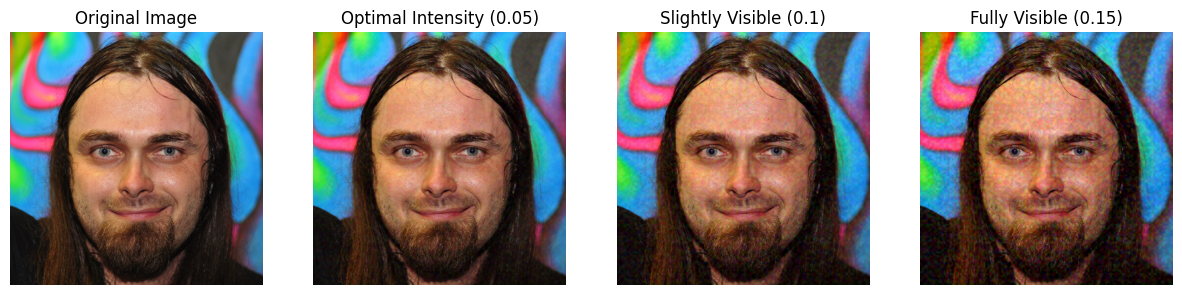

In [36]:
# ✅ Visualize Results
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Original Image
axes[0].imshow(img)
axes[0].set_title("Original Image")
axes[0].axis("off")

# Images with different watermark intensities
titles = [f"Optimal Intensity ({round(intensities[0], 3)})",
          f"Slightly Visible ({round(intensities[1], 3)})",
          f"Fully Visible ({round(intensities[2], 3)})"]

for i, (gen_img, title) in enumerate(zip(generated_images, titles)):
    axes[i + 1].imshow(gen_img)
    axes[i + 1].set_title(title)
    axes[i + 1].axis("off")

plt.show()

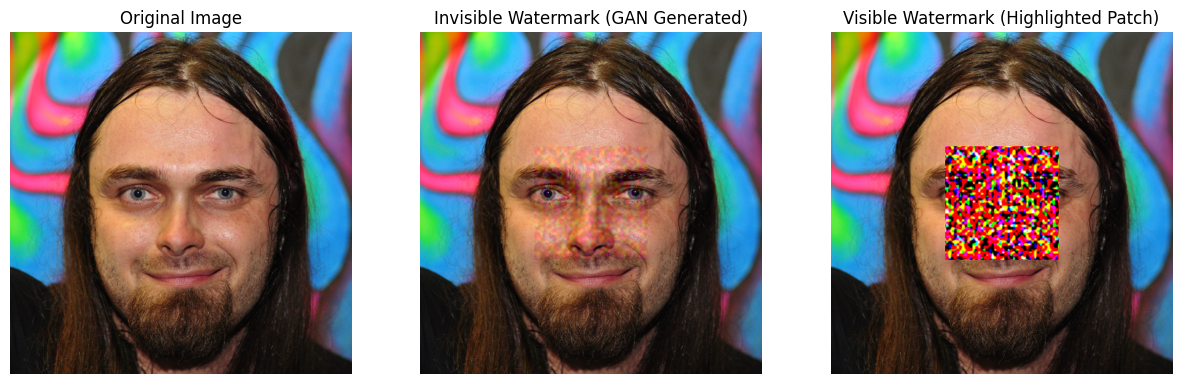

In [45]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage

# ✅ Define user details & metadata
user_secret = "First_testing"
video_metadata = "fps:30-resolution:1920x1080-duration:120"
frame_index = 34  # Fixed frame index
salt = b'pranay_pro'  # Fixed salt for reproducibility

# ✅ Load and preprocess the image
image_path = "/kaggle/input/flickrfaceshq-dataset-ffhq/00040.png"  # Change to your image path
output_path_base = "watermarked_image"  # Output image base name

img = Image.open(image_path).convert('RGB')
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
image_tensor = transform(img).to(device)  # Move to device

# ✅ Compute global video key and frame key
global_video_key = generate_video_key(user_secret+video_metadata)
frame_key = generate_frame_key(global_video_key, frame_index)

# ✅ Generate hash-based noise vector
watermark = hash_to_noise_vector(frame_key, latent_dim=nz)
watermark = watermark.unsqueeze(0).unsqueeze(-1).unsqueeze(-1).to(device)  # Reshape for generator

# ✅ Configure the generator
netG.eval()
for module in netG.modules():
    if isinstance(module, PixelNoise):
        module.use_hash_noise = True
        module.global_video_key = global_video_key
        module.frame_indices = [frame_index]

        # ✅ Extract learned optimal intensity, patch size & coordinates
        learned_intensity = max(0.2, min(module.noise_intensity.item(), 0.5))
        learned_patch_ratio = max(0.2, min(module.patch_size_ratio.item(), 0.5))
        learned_patch_x = max(0.1, min(module.patch_x.item(), 0.9))
        learned_patch_y = max(0.1, min(module.patch_y.item(), 0.9))


# ✅ Generate images using the learned parameters
frame_keys_batch = [frame_key]  # ✅ Convert to list

with torch.no_grad():
    # ✅ Ensure noise is resized to match image dimensions
    # Ensure noise_pattern has the correct shape (1, C, H, W)
    if len(noise_pattern.shape) == 3:
        noise_pattern = noise_pattern.unsqueeze(0)
    
    # Perform interpolation
    noise_pattern = F.interpolate(noise_pattern, size=(H, W), mode='bilinear', align_corners=False)
    
    # Remove batch dimension if needed
    noise_pattern = noise_pattern.squeeze(0)

    
    # ✅ Apply noise **only within the learned patch region**
    patch_H = int(H * learned_patch_ratio)
    patch_W = int(W * learned_patch_ratio)
    x_offset = int(learned_patch_x * (H - patch_H))
    y_offset = int(learned_patch_y * (W - patch_W))
    
    # ✅ Apply watermark at learned intensity (Invisible watermarking)
    watermarked_tensor = image_tensor.clone()
    
    # Ensure dimensions match
    noise_pattern = noise_pattern.squeeze(0)  # Shape becomes [3, H, W]
    watermarked_tensor[:, x_offset:x_offset + patch_H, y_offset:y_offset + patch_W] += (
    noise_pattern[:, x_offset:x_offset + patch_H, y_offset:y_offset + patch_W] * learned_intensity
    )

    
    # ✅ Apply **higher intensity for human-visible watermarking**
    visible_watermark_tensor = image_tensor.clone()
    visible_watermark_tensor[:, x_offset:x_offset + patch_H, y_offset:y_offset + patch_W] += (
        noise_pattern[:, x_offset:x_offset + patch_H, y_offset:y_offset + patch_W] * 3.0
    )


    # ✅ Convert back from [-1,1] to [0,1] for visualization
    def tensor_to_image(tensor):
        tensor = (tensor + 1) / 2.0  # Normalize to [0,1]
        tensor = torch.clamp(tensor, 0, 1)
        return ToPILImage()(tensor.cpu())

    # ✅ Convert all tensors to images
    original_image = tensor_to_image(image_tensor)
    watermarked_image = tensor_to_image(watermarked_tensor)
    visible_watermarked_image = tensor_to_image(visible_watermark_tensor)

    # ✅ Save images
    original_image.save(f"{output_path_base}_original.jpg")
    watermarked_image.save(f"{output_path_base}_GAN_watermarked.jpg")
    visible_watermarked_image.save(f"{output_path_base}_visible_patch.jpg")

# ✅ Display images side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(original_image)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(watermarked_image)
axes[1].set_title("Invisible Watermark (GAN Generated)")
axes[1].axis("off")

axes[2].imshow(visible_watermarked_image)
axes[2].set_title("Visible Watermark (Highlighted Patch)")
axes[2].axis("off")

plt.show()

In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import numpy as np
import torch.nn.functional as F

# ✅ Load the watermarked image
watermarked_path = "watermarked_image_GAN_watermarked.jpg"
img = Image.open(watermarked_path).convert('RGB')

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

watermarked_tensor = transform(img).to(device)  # Move to device


# ✅ Convert frame_key back to noise vector (Reversing the process)
noise_vector = hash_to_noise_vector(frame_key, latent_dim=nz).unsqueeze(0).unsqueeze(-1).unsqueeze(-1).to(device)

# ✅ Extract learned noise parameters from the generator
for module in netG.modules():
    if isinstance(module, PixelNoise):
        patch_x = module.patch_x.item()
        patch_y = module.patch_y.item()
        patch_size_ratio = module.patch_size_ratio.item()
        noise_intensity = module.noise_intensity.item()

# ✅ Generate the same noise pattern again
noise_pattern = netG(noise_vector, [frame_key])
noise_pattern = F.interpolate(noise_pattern, size=watermarked_tensor.shape[-2:], mode='bilinear', align_corners=False)

# ✅ Reverse the watermark embedding
batch_size, channels, H, W = watermarked_tensor.shape
patch_H = int(H * patch_size_ratio)
patch_W = int(W * patch_size_ratio)
x_offset = int(patch_x * (H - patch_H))
y_offset = int(patch_y * (W - patch_W))

# ✅ Remove noise only from the patch area
recovered_tensor = watermarked_tensor.clone()
recovered_tensor[:, :, x_offset:x_offset + patch_H, y_offset:y_offset + patch_W] -= (
    noise_pattern[:, :, x_offset:x_offset + patch_H, y_offset:y_offset + patch_W] * noise_intensity
)

# ✅ Convert back from [-1,1] to [0,1] for visualization
def tensor_to_image(tensor):
    tensor = (tensor + 1) / 2.0
    tensor = torch.clamp(tensor, 0, 1)
    return transforms.ToPILImage()(tensor.squeeze(0))

# ✅ Save the recovered image
recovered_image = tensor_to_image(recovered_tensor)
recovered_image.save("recovered_image.jpg")

# ✅ Show comparison: Original Watermarked vs Recovered
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img)
axes[0].set_title("Watermarked Image")
axes[0].axis("off")

axes[1].imshow(recovered_image)
axes[1].set_title("Recovered Image")
axes[1].axis("off")

plt.show()